import relevant packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

Load aircraft movement database to pandas dataframe

In [5]:
dfAircraftMovements = pd.read_excel("Australia air traffic 1985-2017.xlsx",sheet_name="Aircraft Movements",skiprows=6,na_values=['-'])

Inspect data

In [6]:
dfAircraftMovements.head()

,Unnamed: 0,AIRPORT,Year,Rank,INBOUND,OUTBOUND,TOTAL,INBOUND.1,OUTBOUND.1,TOTAL.1,INBOUND.2,OUTBOUND.2,TOTAL.2
0,TOTAL AUSTRALIA1985,TOTAL AUSTRALIA,1985,NaN,425190,425137,850327,21063,20828,41891,446253,445965,892218
1,TOTAL AUSTRALIA1986,TOTAL AUSTRALIA,1986,NaN,427697,427697,855394,24150,24068,48218,451847,451765,903612
2,TOTAL AUSTRALIA1987,TOTAL AUSTRALIA,1987,NaN,429860,429860,859720,26795,26669,53464,456655,456529,913184
3,TOTAL AUSTRALIA1988,TOTAL AUSTRALIA,1988,NaN,450392,450392,900784,30215,29919,60134,480607,480311,960918
4,TOTAL AUSTRALIA1989,TOTAL AUSTRALIA,1989,NaN,386229,386229,772458,33784,33221,67005,420013,419450,839463


Rename columns

In [7]:
newColumnsName = {"Unnamed: 0": "rowCode", 
                  "INBOUND": "DOMESTIC INBOUND" , 
                  "OUTBOUND": "DOMESTIC OUTBOUND", 
                  "TOTAL": "DOMESTIC TOTAL",
                  "INBOUND.1": "INT INBOUND" , 
                  "OUTBOUND.1": "INT OUTBOUND", 
                  "TOTAL.1": "INT TOTAL",
                  "INBOUND.2": "MOV INBOUND" , 
                  "OUTBOUND.2": "MOV OUTBOUND", 
                  "TOTAL.2": "MOV TOTAL"}
dfAircraftMovements.rename(index=str, columns=newColumnsName,inplace=True)
dfAircraftMovements.drop(columns=['rowCode'],inplace=True)

#remove summation column
dfAircraftMovements = dfAircraftMovements[dfAircraftMovements["AIRPORT"] != "TOTAL AUSTRALIA"]
dfAircraftMovements.head()

,AIRPORT,Year,Rank,DOMESTIC INBOUND,DOMESTIC OUTBOUND,DOMESTIC TOTAL,INT INBOUND,INT OUTBOUND,INT TOTAL,MOV INBOUND,MOV OUTBOUND,MOV TOTAL
33,ADELAIDE,1985,4.0,23526,23498,47024,443,443,886,23969,23941,47910
34,ADELAIDE,1986,3.0,26266,26330,52596,834,837,1671,27100,27167,54267
35,ADELAIDE,1987,4.0,23042,22929,45971,817,819,1636,23859,23748,47607
36,ADELAIDE,1988,4.0,23631,23619,47250,814,813,1627,24445,24432,48877
37,ADELAIDE,1989,4.0,21611,21726,43337,985,980,1965,22596,22706,45302


information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
3399 non-null of type int64 for all columns including data for aircrafts movement, meaning no missing values

In [120]:
dfAircraftMovements.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3366 entries, 33 to 3398
Data columns (total 12 columns):
AIRPORT              3366 non-null object
Year                 3366 non-null int64
Rank                 1081 non-null float64
DOMESTIC INBOUND     3366 non-null int64
DOMESTIC OUTBOUND    3366 non-null int64
DOMESTIC TOTAL       3366 non-null int64
INT INBOUND          3366 non-null int64
INT OUTBOUND         3366 non-null int64
INT TOTAL            3366 non-null int64
MOV INBOUND          3366 non-null int64
MOV OUTBOUND         3366 non-null int64
MOV TOTAL            3366 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 341.9+ KB


In [8]:
#create a copy od aircraft movement with datetime as index, maybe will be useful later
dfAircraftMovements_dt = dfAircraftMovements
dfAircraftMovements_dt['Datetime'] = pd.to_datetime(dfAircraftMovements_dt['Year'],format = '%Y')
dfAircraftMovements_dt = dfAircraftMovements_dt.set_index('Datetime')
dfAircraftMovements_dt.head()
dfAircraftMovements.drop(columns='Datetime',inplace=True)

Examine the difference in the change over the years of the number of flights year according to total flights and average in each year

In [9]:
dfAircraftMovements["YEAR MEAN"] = dfAircraftMovements['MOV TOTAL'].groupby(dfAircraftMovements['Year']).transform('mean')
dfAircraftMovements["YEAR TOTAL"] = dfAircraftMovements['MOV TOTAL'].groupby(dfAircraftMovements['Year']).transform('sum')
dfAircraftMovements.round(2)
dfAircraftMovements.head()



,AIRPORT,Year,Rank,DOMESTIC INBOUND,DOMESTIC OUTBOUND,DOMESTIC TOTAL,INT INBOUND,INT OUTBOUND,INT TOTAL,MOV INBOUND,MOV OUTBOUND,MOV TOTAL,YEAR MEAN,YEAR TOTAL
33,ADELAIDE,1985,4.0,23526,23498,47024,443,443,886,23969,23941,47910,7150.421569,729343
34,ADELAIDE,1986,3.0,26266,26330,52596,834,837,1671,27100,27167,54267,7428.980392,757756
35,ADELAIDE,1987,4.0,23042,22929,45971,817,819,1636,23859,23748,47607,7542.068627,769291
36,ADELAIDE,1988,4.0,23631,23619,47250,814,813,1627,24445,24432,48877,7868.656863,802603
37,ADELAIDE,1989,4.0,21611,21726,43337,985,980,1965,22596,22706,45302,6892.725490,703058


In [10]:
#just another view of data
dfAircraftMovements[dfAircraftMovements["Year"]==1986].head(10)

,AIRPORT,Year,Rank,DOMESTIC INBOUND,DOMESTIC OUTBOUND,DOMESTIC TOTAL,INT INBOUND,INT OUTBOUND,INT TOTAL,MOV INBOUND,MOV OUTBOUND,MOV TOTAL,YEAR MEAN,YEAR TOTAL
34,ADELAIDE,1986,3.0,26266,26330,52596,834,837,1671,27100,27167,54267,7428.980392,757756
67,ALBANY,1986,NaN,624,624,1248,0,0,0,624,624,1248,7428.980392,757756
100,ALBURY,1986,13.0,5919,5899,11818,0,0,0,5919,5899,11818,7428.980392,757756
133,ALICE SPRINGS,1986,23.0,4100,4097,8197,0,0,0,4100,4097,8197,7428.980392,757756
166,ARMIDALE,1986,29.0,2843,2845,5688,0,0,0,2843,2845,5688,7428.980392,757756
199,AURUKUN,1986,NaN,361,361,722,0,0,0,361,361,722,7428.980392,757756
232,AYERS ROCK,1986,NaN,1300,1301,2601,0,0,0,1300,1301,2601,7428.980392,757756
265,BALLINA,1986,NaN,12,12,24,0,0,0,12,12,24,7428.980392,757756
298,BAMAGA,1986,NaN,254,259,513,0,0,0,254,259,513,7428.980392,757756
331,BATHURST,1986,NaN,842,842,1684,0,0,0,842,842,1684,7428.980392,757756


In [11]:
#print(dfAircraftMovements.Year.unique(), type(dfAircraftMovements.Year.unique()))
grouped_df_overall = pd.DataFrame({'Year':dfAircraftMovements.Year.unique(),
                           "YEAR MEAN":np.zeros(np.shape(dfAircraftMovements.Year.unique())),
                           "YEAR TOTAL":np.zeros(np.shape(dfAircraftMovements.Year.unique()))})
grouped_df_overall = grouped_df_overall.set_index('Year')

for index, row in grouped_df_overall.iterrows():
    #print(index)
    grouped_df_overall.loc[index,"YEAR MEAN"] = dfAircraftMovements["MOV TOTAL"][dfAircraftMovements["Year"]==index].mean()
    grouped_df_overall.loc[index,"YEAR TOTAL"] = dfAircraftMovements["MOV TOTAL"][dfAircraftMovements["Year"]==index].sum()
    
print(grouped_df_overall, type(grouped_df_overall))


         YEAR MEAN  YEAR TOTAL
Year                          
1985   7150.421569    729343.0
1986   7428.980392    757756.0
1987   7542.068627    769291.0
1988   7868.656863    802603.0
1989   6892.725490    703058.0
1990   7646.068627    779899.0
1991   8813.019608    898928.0
1992   9336.833333    952357.0
1993   9828.460784   1002503.0
1994  10318.127451   1052449.0
1995  10907.725490   1112588.0
1996  11344.068627   1157095.0
1997  11245.441176   1147035.0
1998  11343.441176   1157031.0
1999  11387.696078   1161545.0
2000  11908.882353   1214706.0
2001  11377.372549   1160492.0
2002   9834.490196   1003118.0
2003   9894.137255   1009202.0
2004  10948.754902   1116773.0
2005  11389.343137   1161713.0
2006  11393.774510   1162165.0
2007  11645.058824   1187796.0
2008  12211.656863   1245589.0
2009  12017.980392   1225834.0
2010  12896.274510   1315420.0
2011  12991.833333   1325167.0
2012  13552.980392   1382404.0
2013  13882.509804   1416016.0
2014  13803.843137   1407992.0
2015  13

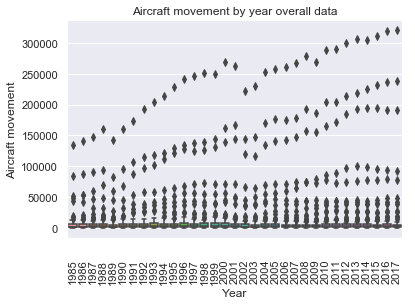

In [12]:
sns.set()

sns_plot =sns.boxplot(x='Year', y='MOV TOTAL', data=dfAircraftMovements )
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
sns_plot.tick_params(axis='x', which='major', pad=15)
sns_plot.set(xlabel='Year', ylabel='Total airport movement')

plt.xlabel('Year')
plt.ylabel('Aircraft movement')
plt.title("Aircraft movement by year overall data")
plt.show()

fig = sns_plot.get_figure()
fig.set_size_inches(18.5, 10)
fig.savefig("output.png") 

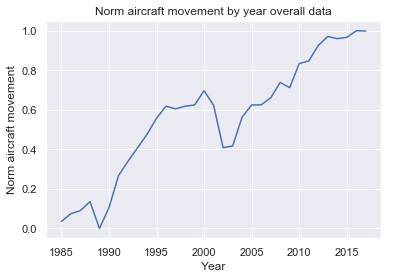

In [15]:
sns.set()

grouped_df_overall.reset_index(inplace=True)
x = grouped_df_overall['Year'].values
y = grouped_df_overall['YEAR MEAN'].values
y = (y-np.min(y)) / (np.max(y)-np.min(y))
sns_plot = sns.lineplot(x,y)

fig = sns_plot.get_figure()

plt.xlabel('Year')
plt.ylabel('Norm aircraft movement')
plt.title("Norm aircraft movement by year overall data")
plt.show()

fig.set_size_inches(18.5, 10)
fig.savefig("output2.png") 

High variation between different airport

Create graphs for total movement based on aircrafts with close ratings

In [13]:
higherRank = dfAircraftMovements_dt['Rank'].max()
print(higherRank)

41.0


Plot bar plot for small airports without ranking and for airports with similar ranking

In [16]:
def createBarPlotOfAirportMovementByYear(df,ax,title):
    
    sns_plot =sns.boxplot(x='Year', y='MOV TOTAL', data=df ,ax=ax)
    sns_plot.set_title(title)
    sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
    sns_plot.tick_params(axis='x', which='major', pad=15)
    sns_plot.set(xlabel='Year', ylabel='Total airport movement')
    

In [17]:
def createDfOfMeanAndTotalByYear(df):
    grouped_df = pd.DataFrame({'Year':df.Year.unique(),
                           "YEAR MEAN":np.zeros(np.shape(df.Year.unique())),
                           "YEAR TOTAL":np.zeros(np.shape(df.Year.unique()))})
    grouped_df = grouped_df.set_index('Year')
    for index, row in grouped_df.iterrows():
        grouped_df.loc[index,"YEAR MEAN"] = df["MOV TOTAL"][df["Year"]==index].mean()
        grouped_df.loc[index,"YEAR TOTAL"] = df["MOV TOTAL"][df["Year"]==index].sum()
    grouped_df.reset_index(inplace=True)
    return grouped_df

In [18]:
def creatLMofMeanByYear(df,ax,title):
    sns_plot = sns.regplot(x="Year", y="YEAR MEAN",data=df,ax=ax)
    sns_plot.set_title(title)
    #fig = sns_plot.get_figure()
    

C:\Users\yael_\AppData\Local\Programs\Python\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


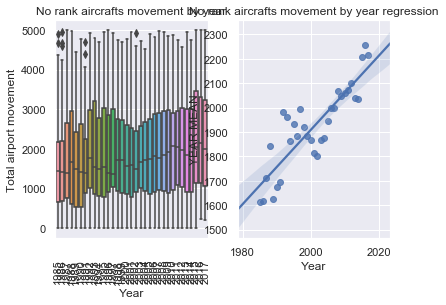

In [19]:

#plot movements without ranking
dfAircraftMovements_no_rank = dfAircraftMovements[dfAircraftMovements["Rank"].isna()]
# 
fig, ax = plt.subplots(ncols=2,nrows=1)
createBarPlotOfAirportMovementByYear(dfAircraftMovements_no_rank,ax[0],"No rank aircrafts movement by year")
grouped_df_no_rank = createDfOfMeanAndTotalByYear(dfAircraftMovements_no_rank)
creatLMofMeanByYear(grouped_df_no_rank,ax[1],"No rank aircrafts movement by year regression")


C:\Users\yael_\AppData\Local\Programs\Python\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


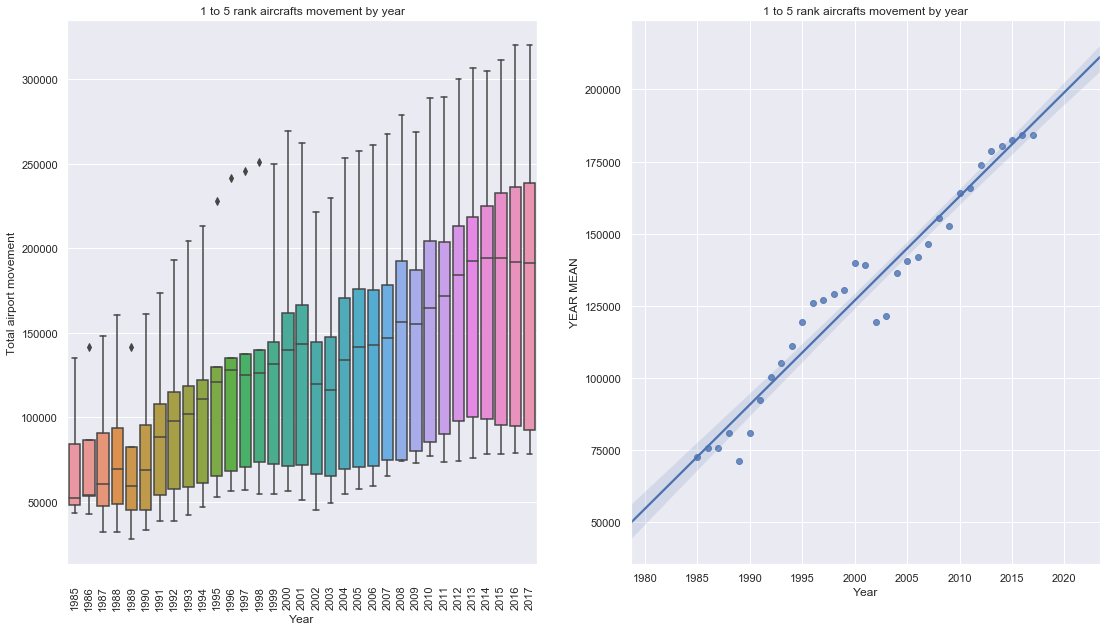

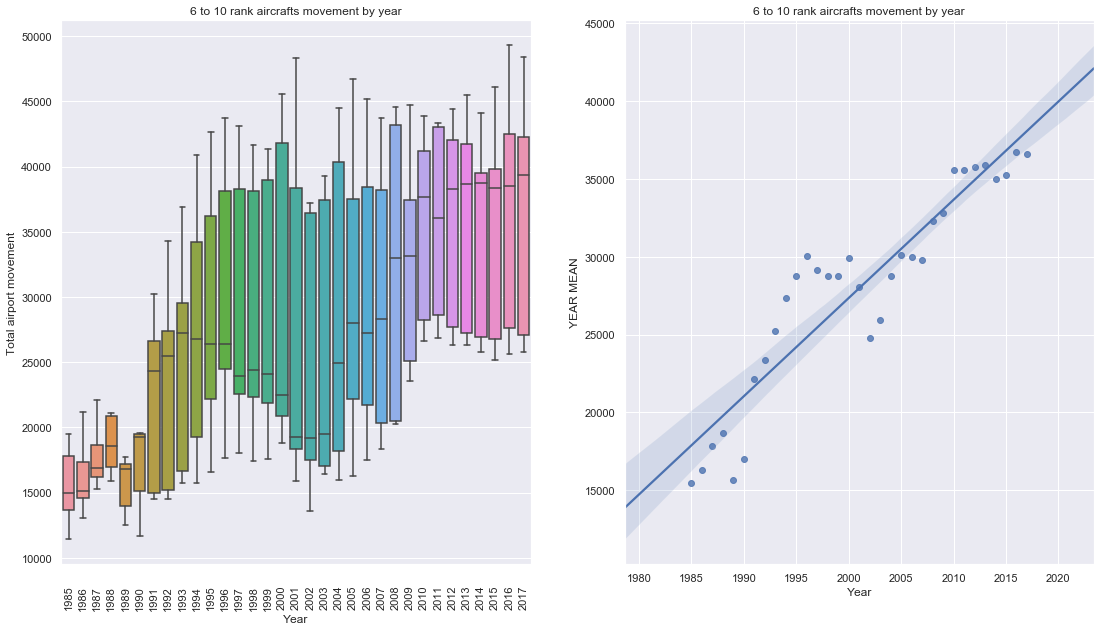

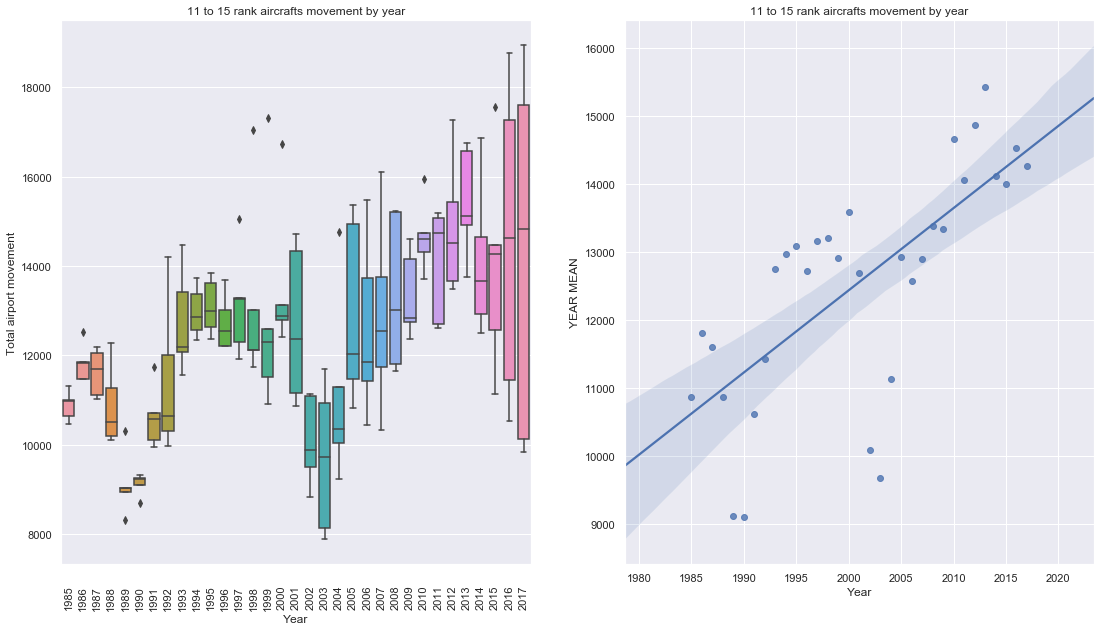

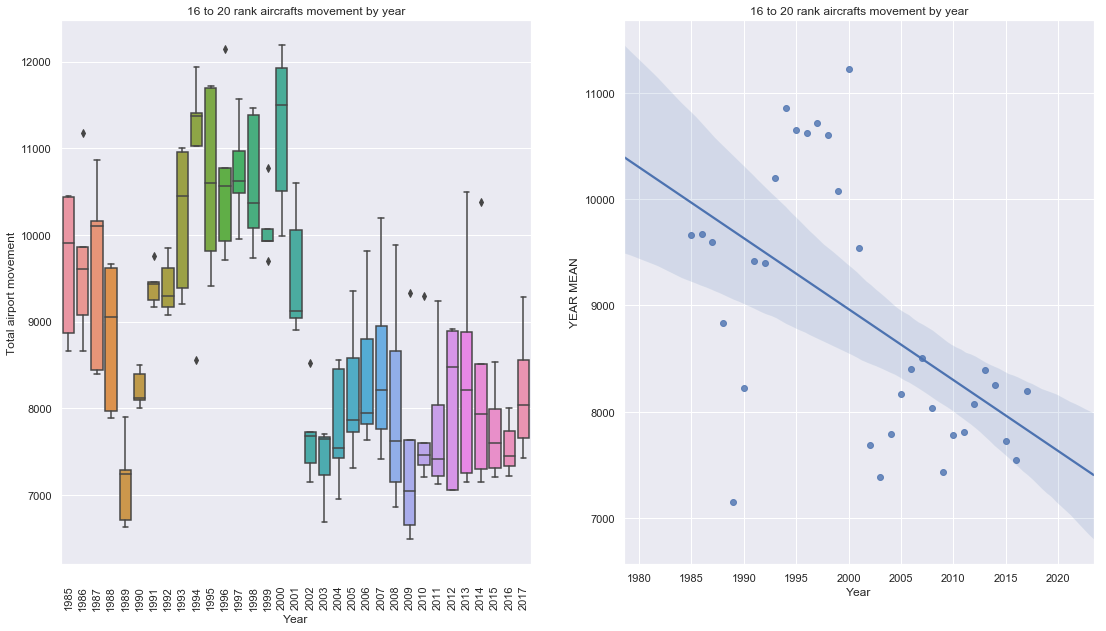

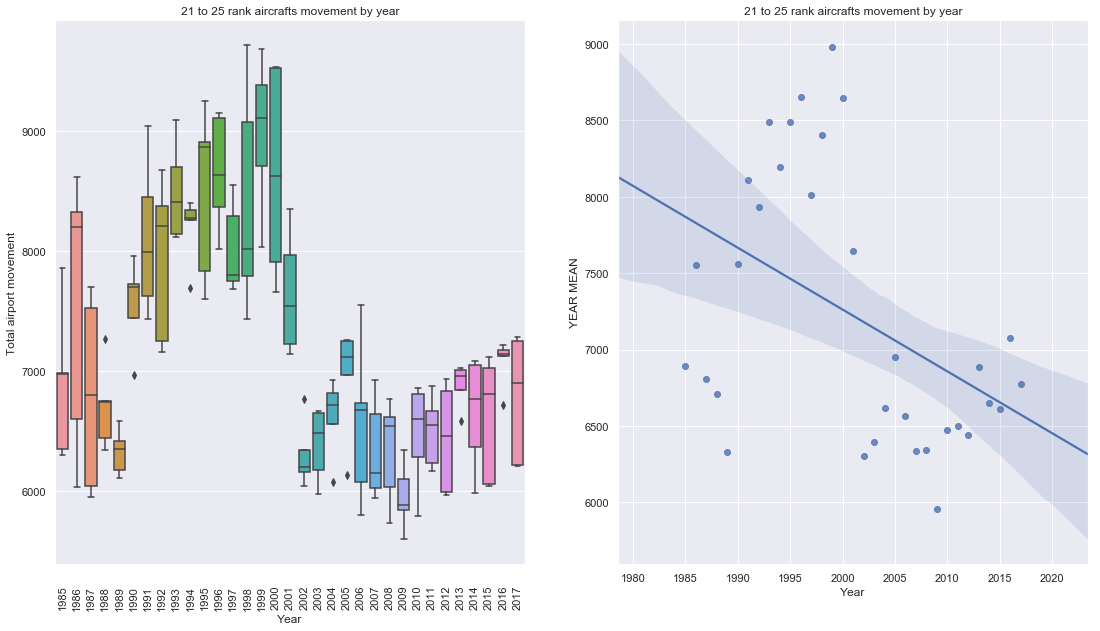

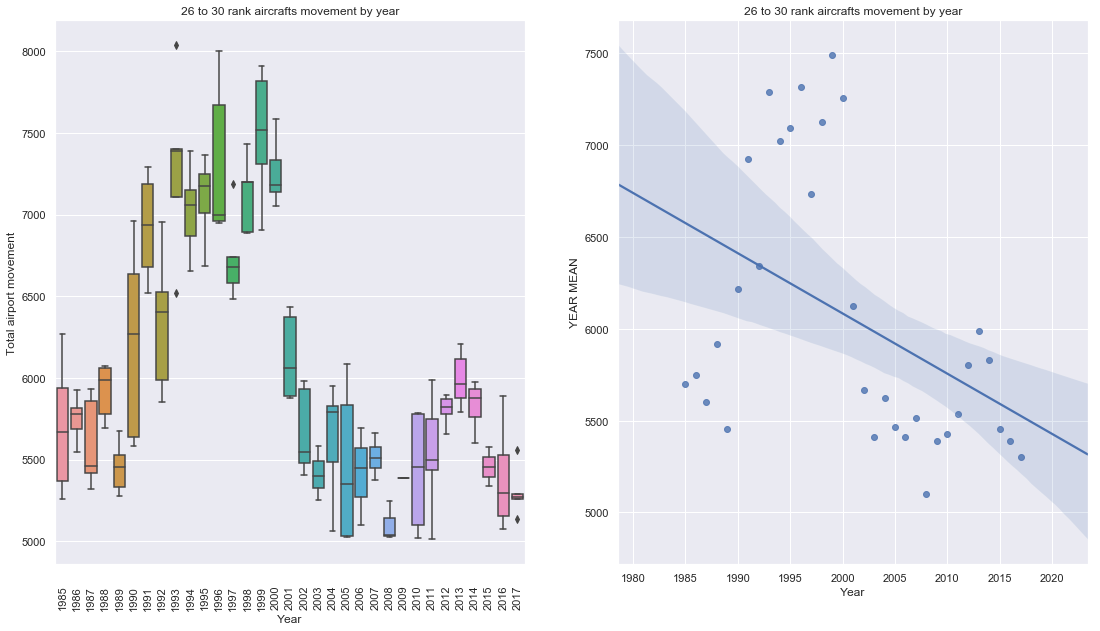

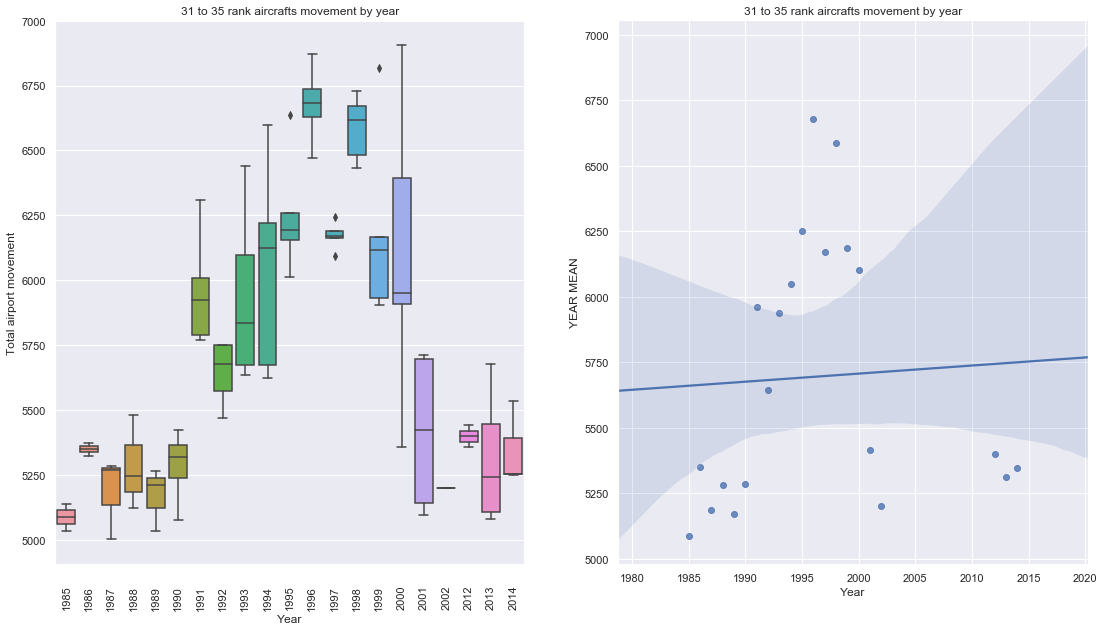

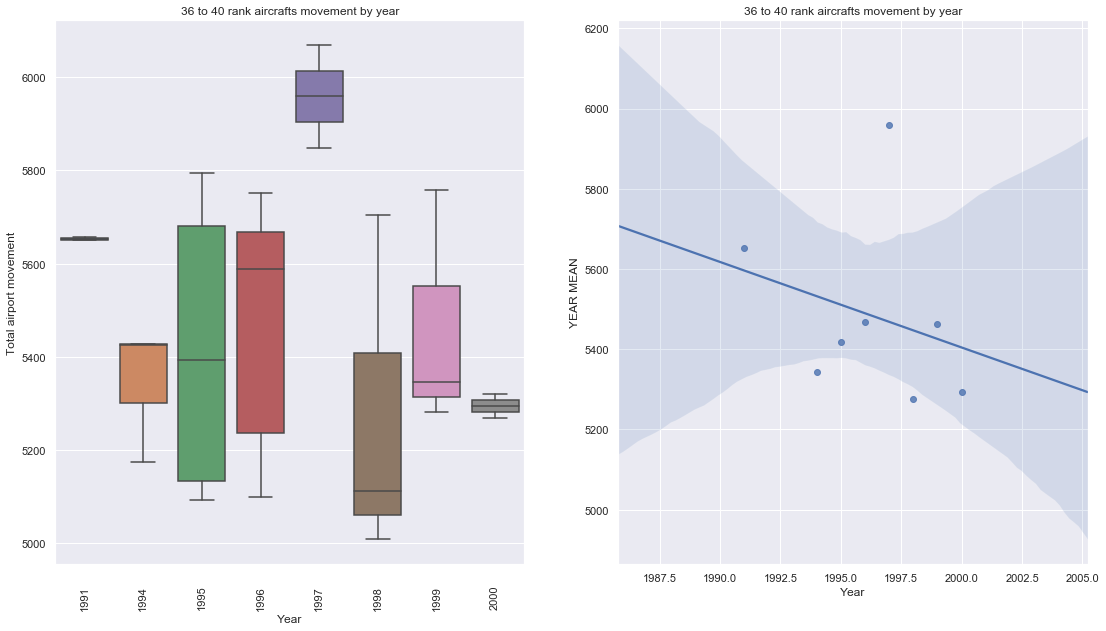

In [20]:
dfAircraftMovements_with_rank = dfAircraftMovements.dropna()

rankRange = 0
grouped_df = []
for i in range(1,int(higherRank),5):
    sns.set()
    fig, ax = plt.subplots(ncols=2,nrows=1)
    dfAircraftMovements_byRank = dfAircraftMovements_with_rank[dfAircraftMovements_with_rank["Rank"] >= i]
    dfAircraftMovements_byRank = dfAircraftMovements_byRank[dfAircraftMovements_byRank["Rank"] < i+5]
    title1 = "%d to %d rank aircrafts movement by year" % (i,i+4)
    createBarPlotOfAirportMovementByYear(dfAircraftMovements_byRank,ax[0],title1)
    grouped_df.append(createDfOfMeanAndTotalByYear(dfAircraftMovements_byRank)) 
    title2 = "%d to %d rank aircrafts movement by year" % (i,i+4)
    creatLMofMeanByYear(grouped_df[rankRange],ax[1],title2)
    fig.set_size_inches(18.5, 10)
    timestr = time.strftime("%Y%m%d-%H%M%S") + ".png"
    fig.savefig(timestr) 
    rankRange = rankRange +1


Display all regression plot on same graph

Normalize all data to shoe on same graph

In [21]:
#grouped_df list
#grouped_df_no_rank
sns.set()

x = grouped_df_no_rank['Year'].values
y = grouped_df_no_rank['YEAR MEAN'].values
y = (y-np.min(y)) / (np.max(y)-np.min(y))


sns.lineplot(x,y,  label="No rank")
for rankRange in range(len(grouped_df)):
    x = grouped_df[rankRange]['Year'].values
    y = grouped_df[rankRange]['YEAR MEAN'].values
    y = (y-np.min(y)) / (np.max(y)-np.min(y))
    sns_plot = sns.lineplot(x,y,label="%d to %d rank"%((rankRange)*5+1,(rankRange)*5 +5))

plt.legend(loc=2) #,bbox_to_anchor=(1.05, 1)
plt.xlabel('Year')
plt.ylabel('Norm aircraft movement')
plt.title("Norm aircraft movement by year all ranks")


fig = sns_plot.get_figure()
fig.set_size_inches(18.5, 9)
timestr = time.strftime("%Y%m%d-%H%M%S") + ".png"
fig.savefig(timestr) 

plt.show()